In [1]:
# Bussiness problem : predict the price
# Price: Continuous     Model: Regression

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", 20)

In [3]:
kch=pd.read_csv("C:\\Users\\riama\\Desktop\\Machine_learning\\kc_house_data (1).csv")

In [4]:
kch.head(5)

id             date                price  bedrooms  \
0  7129300520  20141013T000000           221,900.00         3   
1  6414100192  20141209T000000           538,000.00         3   
2  5631500400  20150225T000000           180,000.00         2   
3  2487200875  20141209T000000           604,000.00         4   
4  1954400510  20150218T000000           510,000.00         3   

             bathrooms  sqft_living  sqft_lot               floors  \
0                 1.00         1180      5650                 1.00   
1                 2.25         2570      7242                 2.00   
2                 1.00          770     10000                 1.00   
3                 3.00         1960      5000                 1.00   
4                 2.00         1680      8080                 1.00   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      7        2170            400      1951   
2           0     0  ...      6         770              0      1933   
3           0     0  ...      7        1050            910      1965   
4           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode                  lat                 long  \
0             0    98178                47.51              -122.26   
1          1991    98125                47.72              -122.32   
2             0    98028                47.74              -122.23   
3             0    98136                47.52              -122.39   
4             0    98074                47.62              -122.05   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
kch.shape

(21613, 21)

* There are total 21613 records/ rows and 12 columns in this dataset

In [6]:
kch.info()   # with this we get some useful information about missing values, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

* There are 20 numerical columns and one objective variable
* There are no missing values in any columns

In [7]:
kch.drop(columns=['id'],axis=1,inplace=True)

### EDA : Exploratory Data Analysis

* Univariate
    * Study each variable at a time
        * Catagorical
        * Numerical
* Bivariate
    * Study two variable at a time
        1. cat - cat
        2. cat - num / num - cat
        3. num - num

In [8]:
kch.describe().transpose()

count                 mean                  std  \
price                    21,613.00           540,088.14           367,127.20   
bedrooms                 21,613.00                 3.37                 0.93   
bathrooms                21,613.00                 2.11                 0.77   
sqft_living              21,613.00             2,079.90               918.44   
sqft_lot                 21,613.00            15,106.97            41,420.51   
floors                   21,613.00                 1.49                 0.54   
waterfront               21,613.00                 0.01                 0.09   
view                     21,613.00                 0.23                 0.77   
condition                21,613.00                 3.41                 0.65   
grade                    21,613.00                 7.66                 1.18   
sqft_above               21,613.00             1,788.39               828.09   
sqft_basement            21,613.00               291.51               442.58   
yr_built                 21,613.00             1,971.01                29.37   
yr_renovated             21,613.00                84.40               401.68   
zipcode                  21,613.00            98,077.94                53.51   
lat                      21,613.00                47.56                 0.14   
long                     21,613.00              -122.21                 0.14   
sqft_living15            21,613.00             1,986.55               685.39   
sqft_lot15               21,613.00            12,768.46            27,304.18   

                               min                  25%                  50%  \
price                    75,000.00           321,950.00           450,000.00   
bedrooms                      0.00                 3.00                 3.00   
bathrooms                     0.00                 1.75                 2.25   
sqft_living                 290.00             1,427.00             1,910.00   
sqft_lot                    520.00             5,040.00             7,618.00   
floors                        1.00                 1.00                 1.50   
waterfront                    0.00                 0.00                 0.00   
view                          0.00                 0.00                 0.00   
condition                     1.00                 3.00                 3.00   
grade                         1.00                 7.00                 7.00   
sqft_above                  290.00             1,190.00             1,560.00   
sqft_basement                 0.00                 0.00                 0.00   
yr_built                  1,900.00             1,951.00             1,975.00   
yr_renovated                  0.00                 0.00                 0.00   
zipcode                  98,001.00            98,033.00            98,065.00   
lat                          47.16                47.47                47.57   
long                       -122.52              -122.33              -122.23   
sqft_living15               399.00             1,490.00             1,840.00   
sqft_lot15                  651.00             5,100.00             7,620.00   

                               75%                  max  
price                   645,000.00         7,700,000.00  
bedrooms                      4.00                33.00  
bathrooms                     2.50                 8.00  
sqft_living               2,550.00            13,540.00  
sqft_lot                 10,688.00         1,651,359.00  
floors                        2.00                 3.50  
waterfront                    0.00                 1.00  
view                          0.00                 4.00  
condition                     4.00                 5.00  
grade                         8.00                13.00  
sqft_above                2,210.00             9,410.00  
sqft_basement               560.00             4,820.00  
yr_built                  1,997.00             2,015.00  
yr_renovated   

#### Catagorical Variables:
   * id, date, bedrooms, bathrooms,  floors, waterfront, view, grade, yr_built, yr_renovated, zipcode, lat, long. 

#### Numerical Variables:
   * price, sqft_living, sqft_lot, condition, sqft_above, sqft_basement, sqft_living15, sqft_lot15, 

### Univariate

In [9]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
    sns.histplot(data[x],kde=True)
    plt.show()
    sns.boxplot(data=data,y=data[x])
    plt.show()
    return myvalue

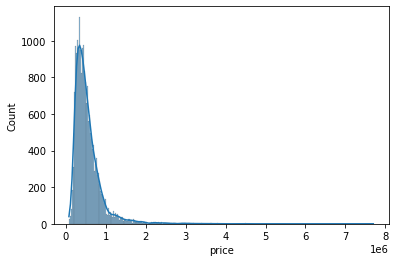

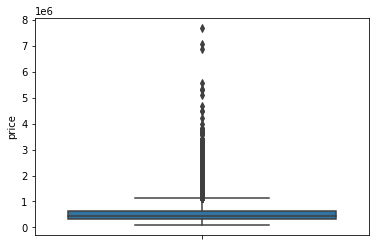

{'missing': 0,
 'min': 75000.0,
 'max': 7700000.0,
 'mean': 540088.14,
 'var': 134782378397.25,
 'std': 367127.2,
 'range': 7625000.0,
 'q1': 321950.0,
 'q2': 450000.0,
 'q3': 645000.0,
 'skewness': 4.02,
 'Kurtosis': 34.59}

In [10]:
univariate_num(kch,'price')

* There is no missing value in price
* price is positive skewed
* There are alot of upper outliers

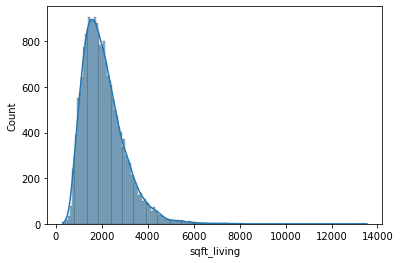

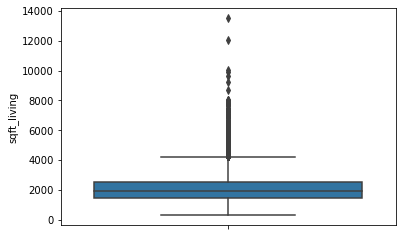

{'missing': 0,
 'min': 290,
 'max': 13540,
 'mean': 2079.9,
 'var': 843533.68,
 'std': 918.44,
 'range': 13250,
 'q1': 1427.0,
 'q2': 1910.0,
 'q3': 2550.0,
 'skewness': 1.47,
 'Kurtosis': 5.24}

In [11]:
univariate_num(kch,'sqft_living')

* There is no missing value in sqft_living
* It is positive skewed
* There are alot of upper outliers

### Bivariate

In [12]:
kch['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
kch.groupby(kch["bedrooms"]).agg({"price" : [np.min, np.max, np.mean, 'count']}) 

price                                                
                         amin                 amax                 mean count
bedrooms                                                                     
0                  139,950.00         1,295,650.00           409,503.85    13
1                   75,000.00         1,247,000.00           317,642.88   199
2                   78,000.00         3,278,000.00           401,372.68  2760
3                   82,000.00         3,800,000.00           466,232.08  9824
4                  100,000.00         4,489,000.00           635,419.50  6882
5                  133,000.00         7,062,500.00           786,599.83  1601
6                  175,000.00         7,700,000.00           825,520.64   272
7                  280,000.00         3,200,000.00           951,184.66    38
8                  340,000.00         3,300,000.00         1,105,076.92    13
9                  450,000.00         1,400,000.00           893,999.83     6
10                 650,000.00         1,148,000.00           819,333.33     3
11                 520,000.00           520,000.00           520,000.00     1
33                 640,000.00           640,000.00           640,000.00     1

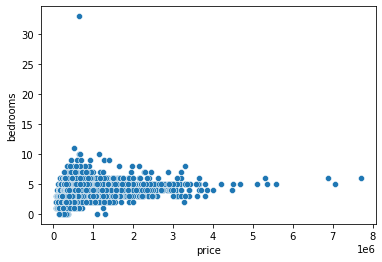

In [14]:
sns.scatterplot(data=kch, x=kch["price"],y=kch["bedrooms"])
plt.show()

* There is no proper relation between inc in number of bedrooms and price increase.
* It has outliers

In [15]:
kch.groupby(kch["waterfront"]).agg({"price" : [np.min, np.max, np.mean, 'count']}) 

price                                            \
                           amin                 amax                 mean   
waterfront                                                                  
0                     75,000.00         7,700,000.00           531,563.60   
1                    285,000.00         7,062,500.00         1,661,876.02   

                   
            count  
waterfront         
0           21450  
1             163

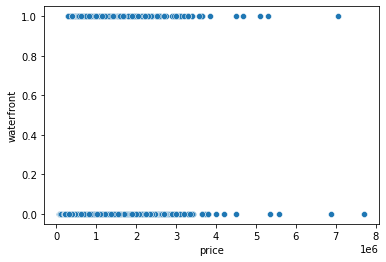

In [16]:
sns.scatterplot(data=kch, x=kch["price"],y=kch["waterfront"])
plt.show()

* The houses with waterfront costs more than non-waterfront houses
* As such there is no relation between each other

In [17]:
kch[["price","sqft_living"]].corr()

price          sqft_living
price                       1.00                 0.70
sqft_living                 0.70                 1.00

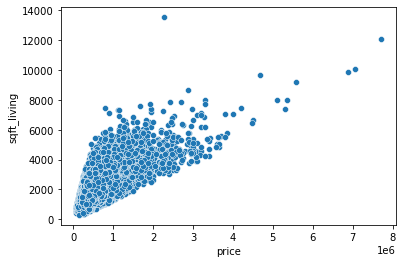

In [18]:
sns.scatterplot(data=kch, x=kch["price"],y=kch["sqft_living"])
plt.show()

* The price of house increases with increase in sqft_living
* There is a positive relation betweem price and grade

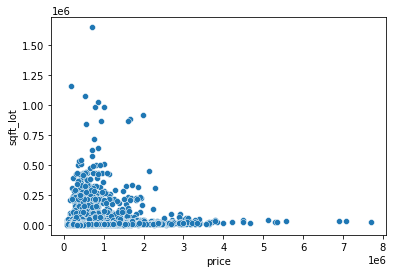

In [19]:
sns.scatterplot(data=kch, x=kch["price"],y=kch["sqft_lot"])
plt.show()

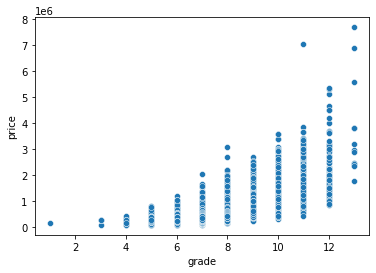

In [20]:
sns.scatterplot(data=kch, y=kch["price"],x=kch["grade"])
plt.show()

* There is a positive relation betweem price and grade
* The price of house increases with increase in grades

In [21]:
kch.groupby(kch["view"]).agg({"price" : [np.min, np.max, np.mean, 'count']}) 

price                                                 
                     amin                 amax                 mean  count
view                                                                      
0               75,000.00         5,570,000.00           496,564.19  19489
1              217,000.00         3,650,000.00           812,280.84    332
2              169,317.00         7,062,500.00           792,400.89    963
3              154,000.00         7,700,000.00           971,965.27    510
4              252,000.00         6,885,000.00         1,463,711.24    319

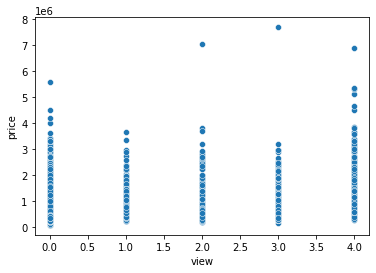

In [22]:
sns.scatterplot(data=kch, y=kch["price"],x=kch["view"])
plt.show()

* As number of views inc. the price increases slightly
* There is no as such relation betweem price and view

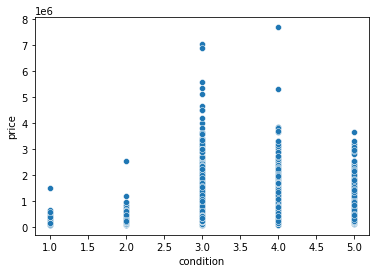

In [23]:
sns.scatterplot(data=kch, y=kch["price"],x=kch["condition"])
plt.show()

* There is as such no relation between price and condition of house, the condition 3 house generally has higher price

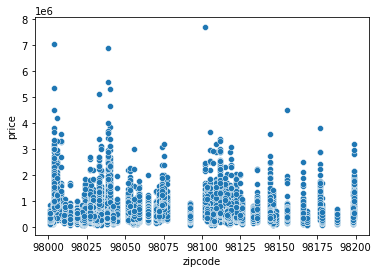

In [24]:
sns.scatterplot(data=kch, y=kch["price"],x=kch["zipcode"])
plt.show()

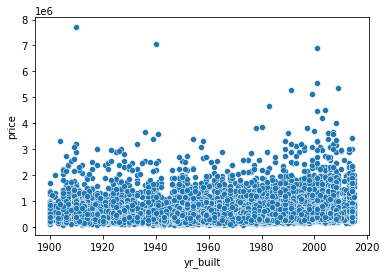

In [25]:
sns.scatterplot(data=kch, y=kch["price"],x=kch["yr_built"])
plt.show()

* There is as such no relation between yr_built and price

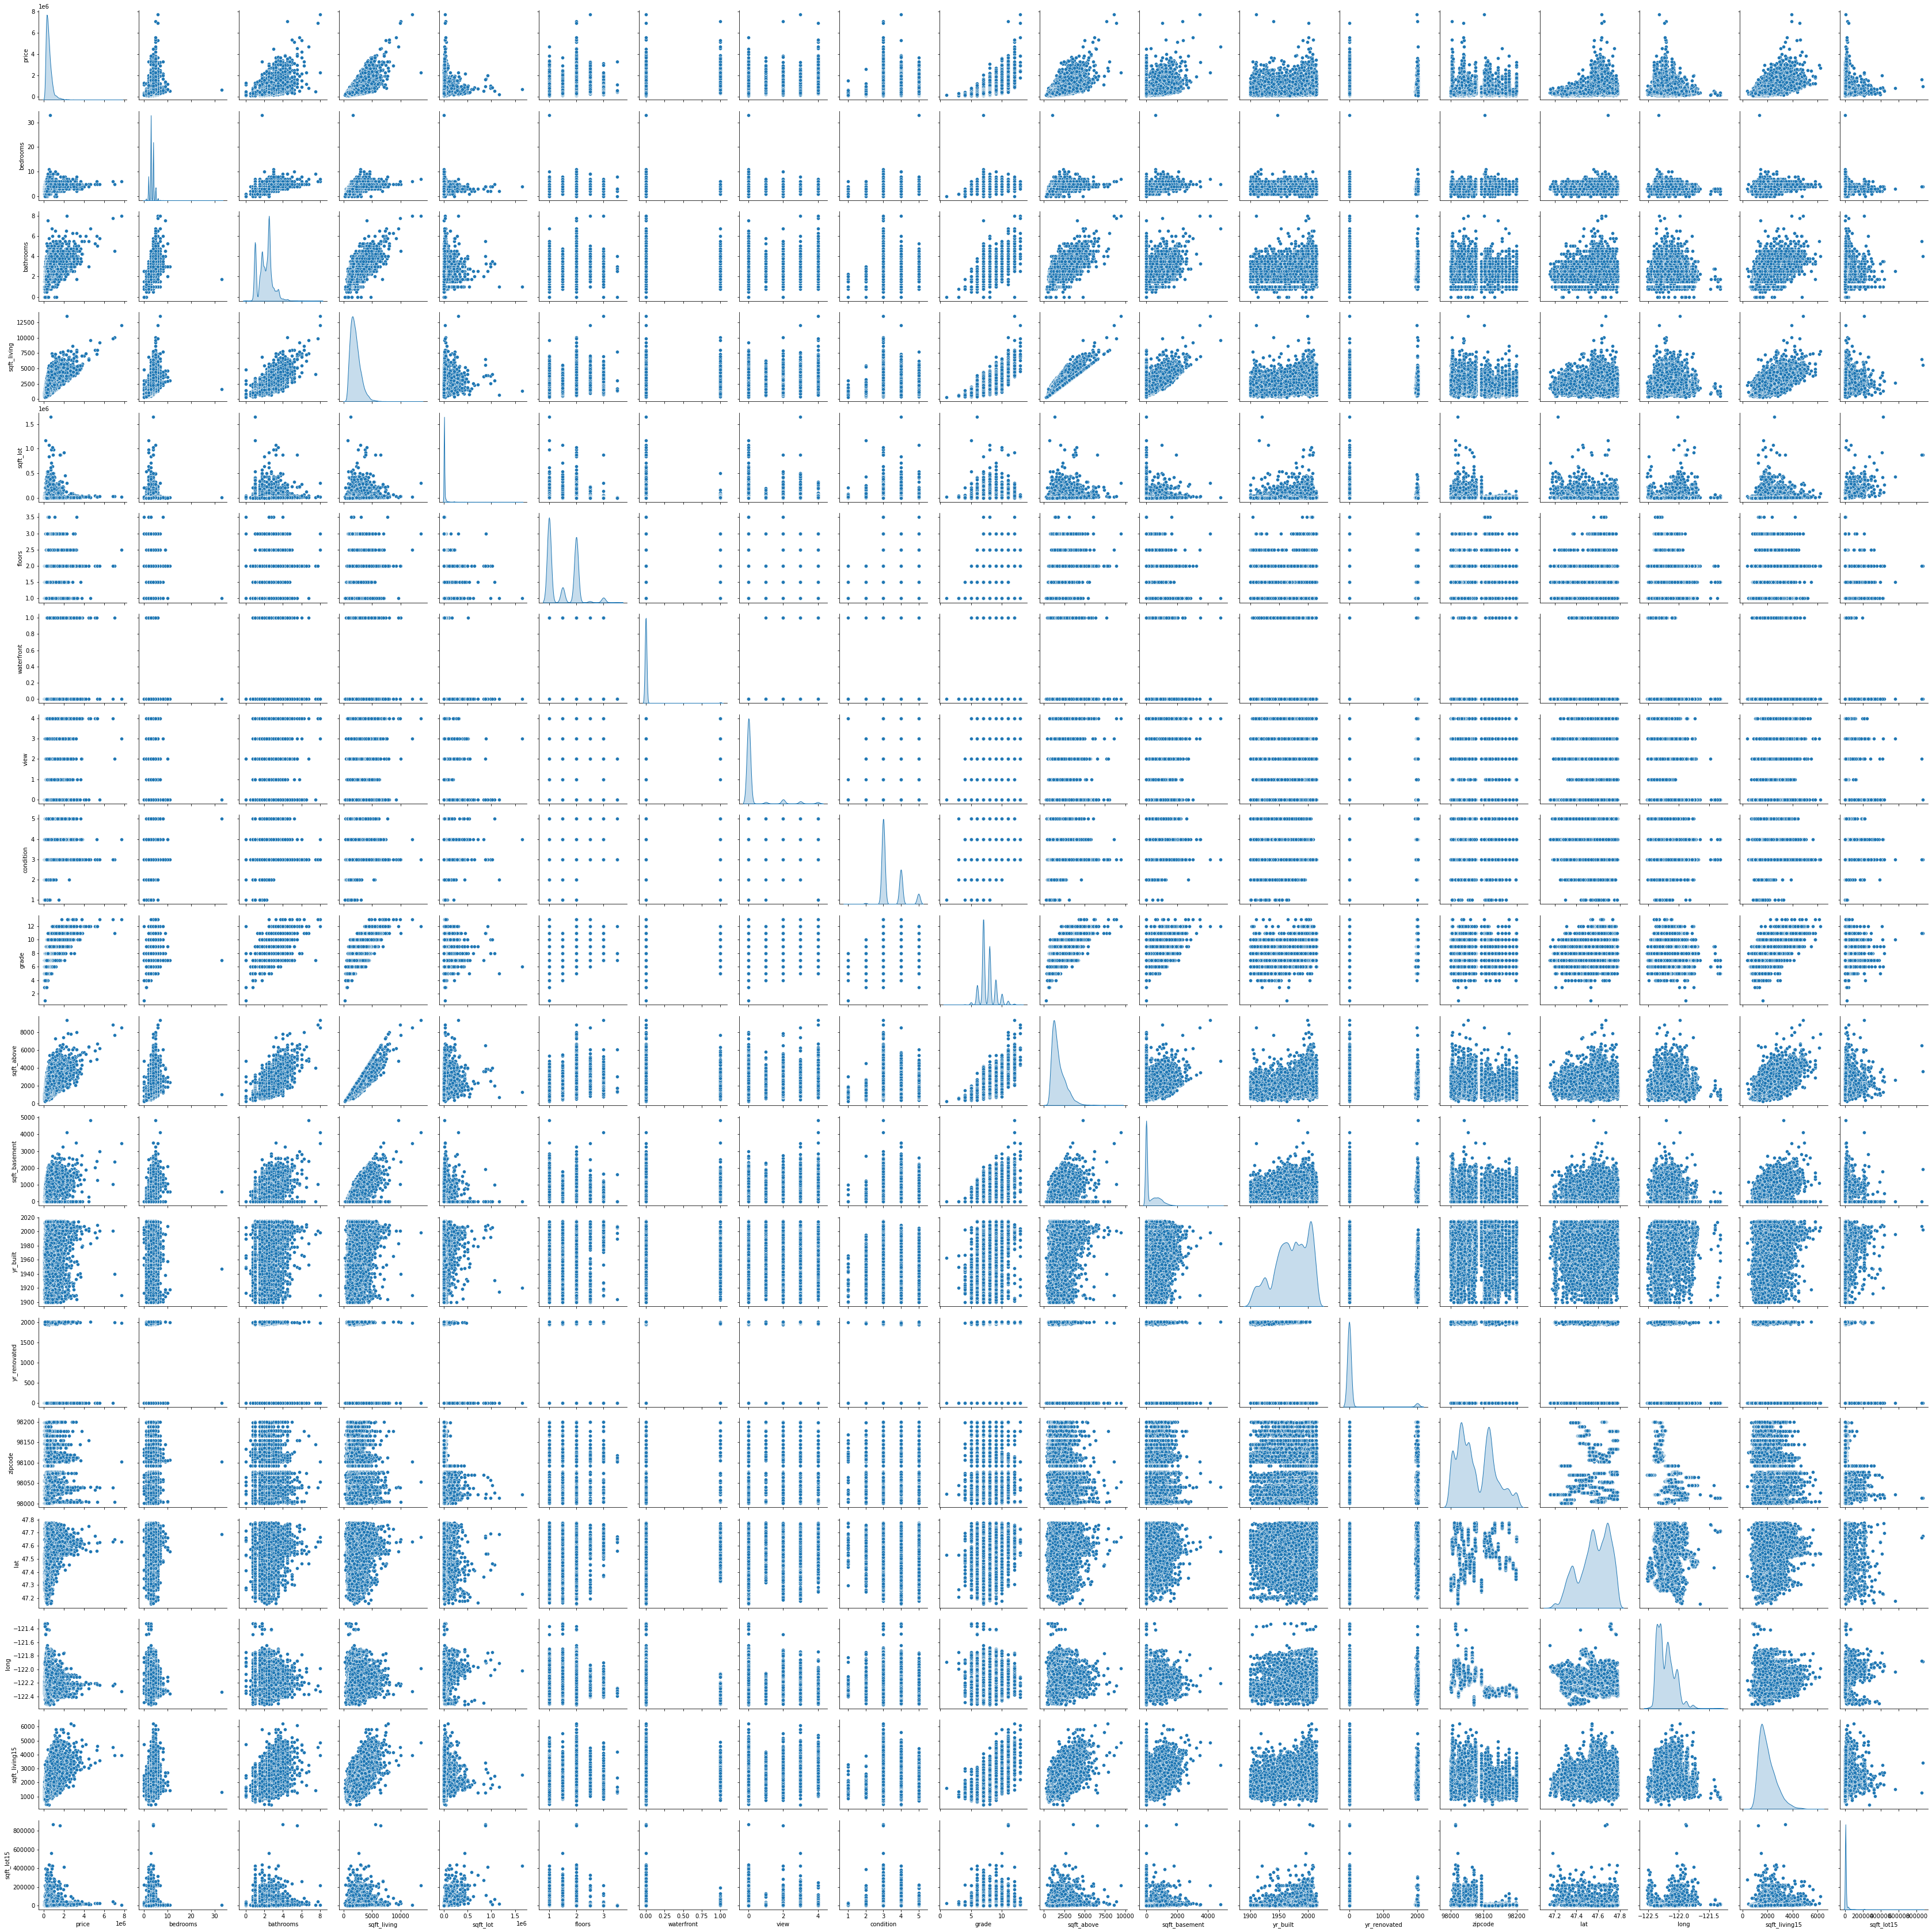

In [26]:
sns.pairplot(kch,diag_kind='kde')

* The price of house increases with increase in sqft_living


### Missing Value Treatement

In [27]:
kch.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* No missing value in this data so no need of treatment

In [28]:
# kch.drop(columns=['zipcode','lat','long'],inplace=(True))

In [29]:
kch

date                price  bedrooms            bathrooms  \
0      20141013T000000           221,900.00         3                 1.00   
1      20141209T000000           538,000.00         3                 2.25   
2      20150225T000000           180,000.00         2                 1.00   
3      20141209T000000           604,000.00         4                 3.00   
4      20150218T000000           510,000.00         3                 2.00   
...                ...                  ...       ...                  ...   
21608  20140521T000000           360,000.00         3                 2.50   
21609  20150223T000000           400,000.00         4                 2.50   
21610  20140623T000000           402,101.00         2                 0.75   
21611  20150116T000000           400,000.00         3                 2.50   
21612  20141015T000000           325,000.00         2                 0.75   

       sqft_living  sqft_lot               floors  waterfront  view  \
0             1180      5650                 1.00           0     0   
1             2570      7242                 2.00           0     0   
2              770     10000                 1.00           0     0   
3             1960      5000                 1.00           0     0   
4             1680      8080                 1.00           0     0   
...            ...       ...                  ...         ...   ...   
21608         1530      1131                 3.00           0     0   
21609         2310      5813                 2.00           0     0   
21610         1020      1350                 2.00           0     0   
21611         1600      2388                 2.00           0     0   
21612         1020      1076                 2.00           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1955             0   
1              3      7        2170            400      1951          1991   
2              3      6         770              0      1933             0   
3              5      7        1050            910      1965             0   
4              3      8        1680              0      1987             0   
...          ...    ...         ...            ...       ...           ...   
21608          3      8        1530              0      2009             0   
21609          3      8        2310              0      2014             0   
21610          3      7        1020              0      2009             0   
21611          3      8        1600              0      2004             0   
21612          3      7        1020              0      2008             0   

       zipcode                  lat                 long  sqft_living15  \
0        98178                47.51              -122.26           1340   
1        98125                47.72              -122.32           1690   
2        98028                47.74              -122.23           2720   
3        98136                47.52              -122.39           1360   
4        98074                47.62              -122.05           1800   
...        ...                  ...                  ...            ...   
21608    98103                47.70              -122.35           1530   
21609    98146                47.51              -122.36           1830   
21610    98144                47.59              -122.30           1020   
21611    98027                47.53              -122.07           1410   
21612    98144                47.59              -122.30           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 20 columns]

In [30]:
kch['date']=kch['date'].str[:4]

In [31]:
kch['date']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date, Length: 21613, dtype: object

In [32]:
kch['date']=pd.to_numeric(kch['date'])

In [33]:
kch["year_old"]=kch['date']-kch["yr_built"]

In [34]:
kch.drop(columns=['yr_built','date'],inplace=True)

### Outliers

In [35]:
o=kch.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T
o

count                 mean                  std  \
price                    21,613.00           540,088.14           367,127.20   
bedrooms                 21,613.00                 3.37                 0.93   
bathrooms                21,613.00                 2.11                 0.77   
sqft_living              21,613.00             2,079.90               918.44   
sqft_lot                 21,613.00            15,106.97            41,420.51   
floors                   21,613.00                 1.49                 0.54   
waterfront               21,613.00                 0.01                 0.09   
view                     21,613.00                 0.23                 0.77   
condition                21,613.00                 3.41                 0.65   
grade                    21,613.00                 7.66                 1.18   
sqft_above               21,613.00             1,788.39               828.09   
sqft_basement            21,613.00               291.51               442.58   
yr_renovated             21,613.00                84.40               401.68   
zipcode                  21,613.00            98,077.94                53.51   
lat                      21,613.00                47.56                 0.14   
long                     21,613.00              -122.21                 0.14   
sqft_living15            21,613.00             1,986.55               685.39   
sqft_lot15               21,613.00            12,768.46            27,304.18   
year_old                 21,613.00                43.32                29.38   

                               min                   1%                   2%  \
price                    75,000.00           153,500.36           175,000.00   
bedrooms                      0.00                 2.00                 2.00   
bathrooms                     0.00                 1.00                 1.00   
sqft_living                 290.00               720.00               790.00   
sqft_lot                    520.00             1,013.12             1,184.00   
floors                        1.00                 1.00                 1.00   
waterfront                    0.00                 0.00                 0.00   
view                          0.00                 0.00                 0.00   
condition                     1.00                 3.00                 3.00   
grade                         1.00                 5.00                 6.00   
sqft_above                  290.00               700.00               750.00   
sqft_basement                 0.00                 0.00                 0.00   
yr_renovated                  0.00                 0.00                 0.00   
zipcode                  98,001.00            98,001.00            98,002.00   
lat                          47.16                47.26                47.27   
long                       -122.52              -122.41              -122.40   
sqft_living15               399.00               950.00             1,020.00   
sqft_lot15                  651.00             1,191.24             1,296.24   
year_old                     -1.00                 0.00                 0.00   

                                3%                   4%                   5%  \
price                   191,342.00           202,344.00           210,000.00   
bedrooms                      2.00                 2.00                 2.00   
bathrooms                     1.00                 1.00                 1.00   
sqft_living                 840.00               900.00               940.00   
sqft_lot                  1,305.36             1,489.48             1,800.00   
floors                        1.00                 1.00                 1.00   
waterfront                    0.00                 0.00                 0.00   
view                          0.00                 0.00                 0.00   
condition                     3.00                 3.00                 3.00   
grade                      

C:\Users\riama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_old'>

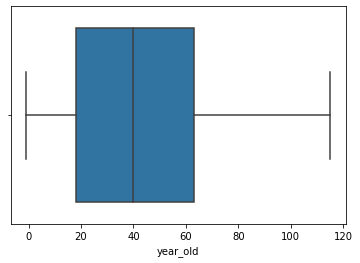

In [36]:
sns.boxplot(kch['year_old'])

In [37]:
out=['price','lat','long','view', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 
     'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
kch_out=kch[out]

In [38]:
not_out=['zipcode','waterfront', 'floors','year_old', 'yr_renovated']
kch_not_out=kch[not_out]

In [39]:
### Outilers capping FUnction - Method -1
def  outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [40]:
kch_out1=kch_out.apply(outliers_percentile)
kch_out1

price                  lat                 long  view  \
0               221,900.00                47.51              -122.26     0   
1               538,000.00                47.72              -122.32     0   
2               180,000.00                47.74              -122.23     0   
3               604,000.00                47.52              -122.39     0   
4               510,000.00                47.62              -122.05     0   
...                    ...                  ...                  ...   ...   
21608           360,000.00                47.70              -122.35     0   
21609           400,000.00                47.51              -122.36     0   
21610           402,101.00                47.59              -122.30     0   
21611           400,000.00                47.53              -122.07     0   
21612           325,000.00                47.59              -122.30     0   

                  bedrooms            bathrooms          sqft_living  \
0                     3.00                 1.00             1,180.00   
1                     3.00                 2.25             2,570.00   
2                     2.00                 1.00               770.00   
3                     4.00                 3.00             1,960.00   
4                     3.00                 2.00             1,680.00   
...                    ...                  ...                  ...   
21608                 3.00                 2.50             1,530.00   
21609                 4.00                 2.50             2,310.00   
21610                 2.00                 1.00             1,020.00   
21611                 3.00                 2.50             1,600.00   
21612                 2.00                 1.00             1,020.00   

                  sqft_lot            condition                grade  \
0                 5,650.00                 3.00                 7.00   
1                 7,242.00                 3.00                 7.00   
2                10,000.00                 3.00                 6.00   
3                 5,000.00                 5.00                 7.00   
4                 8,080.00                 3.00                 8.00   
...                    ...                  ...                  ...   
21608             1,131.00                 3.00                 8.00   
21609             5,813.00                 3.00                 8.00   
21610             1,350.00                 3.00                 7.00   
21611             2,388.00                 3.00                 8.00   
21612             1,076.00                 3.00                 7.00   

                sqft_above        sqft_basement        sqft_living15  \
0                 1,180.00                 0.00             1,340.00   
1                 2,170.00               400.00             1,690.00   
2                   770.00                 0.00             2,720.00   
3                 1,050.00               910.00             1,360.00   
4                 1,680.00                 0.00             1,800.00   
...                    ...                  ...                  ...   
21608             1,530.00                 0.00             1,530.00   
21609             2,310.00                 0.00             1,830.00   
21610             1,020.00                 0.00             1,020.00   
21611             1,600.00                 0.00             1,410.00   
21612             1,020.00                 0.00             1,020.00   

                sqft_lot15  
0                 5,650.00  
1                 7,639.00  
2                 8,062.00  
3                 5,000.00  
4                 7,503.00  
...                    ...  
21608             1,509.00  
21609             7,200.00  
21610             2,007.00  
21611             1,287.00  
21612             1,357.00  

[21613 rows x 14 columns]

In [41]:
kch1=pd.concat([kch_out1,kch_not_out],axis=1)

In [42]:
kch1.head(5)

price                  lat                 long  view  \
0           221,900.00                47.51              -122.26     0   
1           538,000.00                47.72              -122.32     0   
2           180,000.00                47.74              -122.23     0   
3           604,000.00                47.52              -122.39     0   
4           510,000.00                47.62              -122.05     0   

              bedrooms            bathrooms          sqft_living  \
0                 3.00                 1.00             1,180.00   
1                 3.00                 2.25             2,570.00   
2                 2.00                 1.00               770.00   
3                 4.00                 3.00             1,960.00   
4                 3.00                 2.00             1,680.00   

              sqft_lot            condition                grade  \
0             5,650.00                 3.00                 7.00   
1             7,242.00                 3.00                 7.00   
2            10,000.00                 3.00                 6.00   
3             5,000.00                 5.00                 7.00   
4             8,080.00                 3.00                 8.00   

            sqft_above        sqft_basement        sqft_living15  \
0             1,180.00                 0.00             1,340.00   
1             2,170.00               400.00             1,690.00   
2               770.00                 0.00             2,720.00   
3             1,050.00               910.00             1,360.00   
4             1,680.00                 0.00             1,800.00   

            sqft_lot15  zipcode  waterfront               floors  year_old  \
0             5,650.00    98178           0                 1.00        59   
1             7,639.00    98125           0                 2.00        63   
2             8,062.00    98028           0                 1.00        82   
3             5,000.00    98136           0                 1.00        49   
4             7,503.00    98074           0                 1.00        28   

   yr_renovated  
0             0  
1          1991  
2             0  
3             0  
4             0

### Multicollinearity/ Collinearity

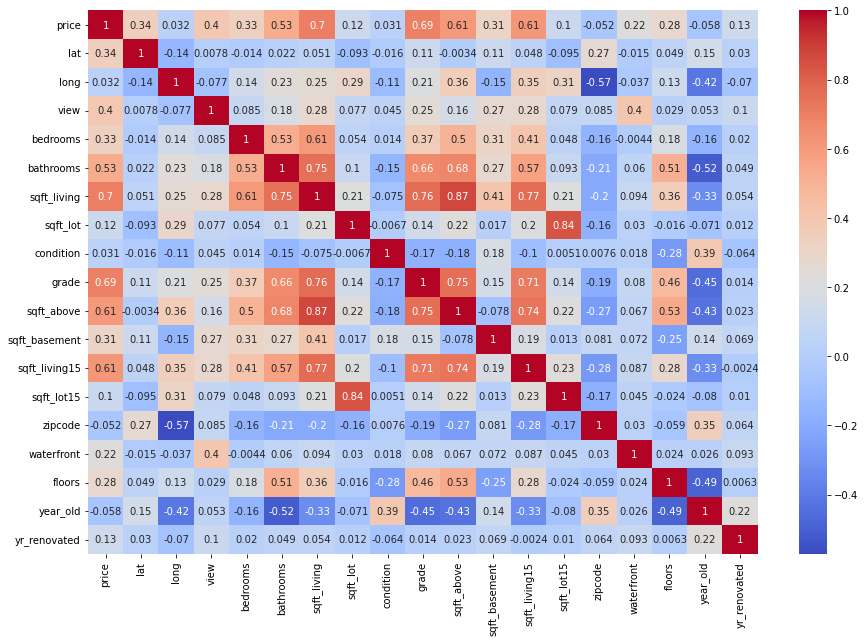

In [43]:
cr=kch1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cr,annot=True, cmap='coolwarm')
plt.show()

In [44]:
kch1.columns

Index(['price', 'lat', 'long', 'view', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'zipcode', 'waterfront', 'floors',
       'year_old', 'yr_renovated'],
      dtype='object')

In [45]:
# 'bathrooms', 'grade', 'waterfront', 'view','lat', 'year_old'

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=kch1[['lat', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 
        'grade', 'waterfront', 'view', 'floors', 'year_old']]

# VIF dataframe
vif_data=pd.DataFrame()
vif_data['feature']=X.columns

# calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]

vif_data.sort_values(by=['VIF'], ascending=False)

feature                  VIF
0           lat               149.09
6         grade               133.83
5     condition                36.42
3   sqft_living                28.92
2     bathrooms                28.55
1      bedrooms                28.15
9        floors                13.82
10     year_old                 5.77
8          view                 1.47
4      sqft_lot                 1.35
7    waterfront                 1.21

### Normality

In [47]:
from scipy.stats import shapiro

Jarque_beraResult(statistic=41724.37424381912, pvalue=0.0)


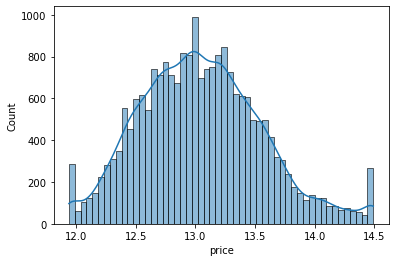

In [48]:
from scipy.stats import jarque_bera
print(jarque_bera(kch1["price"]))
sns.histplot(np.log(kch1["price"]),kde=True)
plt.show()

* The price is not normally distributed in this 

In [49]:
x=kch1[['lat', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 
        'grade', 'waterfront', 'view', 'floors', 'year_old']]
y=kch1["price"]

In [50]:
from sklearn.model_selection import train_test_split    # Train test split
from sklearn.linear_model import LinearRegression       # Model Development
from sklearn import metrics                             # Model Evaluate

In [51]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25,random_state=8)  # Test size (70:30 less for test), random state will lock the data in train or test

In [52]:
reg=LinearRegression()
reg.fit(x_train,y_train)    # model development, y train is target and x train is feature

LinearRegression()

In [53]:
reg.coef_

array([ 5.54801174e+05, -2.28256756e+04,  3.60209314e+04,  1.39045699e+02,
       -1.87001678e-02,  2.91482941e+04,  1.09639981e+05,  3.20028202e+05,
        5.22658203e+04,  2.29542881e+04,  2.51033595e+03])

In [54]:
reg.intercept_

-27237072.063379806

In [55]:
# R^2: How much %age of variance can be explained by this model/ variable    (Coefficient of Determinent)
print("Train R^2 :", reg.score(x_train,y_train))

Train R^2 : 0.7195674096950501


In [56]:
print("Test R^2 :", reg.score(x_test,y_test))

Test R^2 : 0.7348451210703079


In [57]:
pred_train=reg.predict(x_train)
pred_train

array([1274126.81714838,  600251.16294587,  633038.33686566, ...,
        782716.7519964 ,  246129.33368251,  338753.02578794])

In [58]:
pred_test=reg.predict(x_test)
pred_test

array([453197.3428386 , 681986.17057311, 189464.10202938, ...,
       528294.12766132, 386094.3545706 , 638088.89074206])

In [59]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 28141392078.36592
Train rmse 167753.9629289452
Train MAE 115773.74063579958
Train MAPE 0.23744406079773636


In [60]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 27045289186.333015
Test rmse 164454.5201152374
Test MAE 113612.09280654503
Test MAPE 0.23217587728433642


In [61]:
pred_act_train=pd.DataFrame({'Act':y_train, 'Pred':pred_train})
pred_act_train.head(4)

Act                 Pred
7387          1,775,000.00         1,274,126.82
21363           410,000.00           600,251.16
572             442,000.00           633,038.34
10189           270,000.00           324,570.10

<AxesSubplot:>

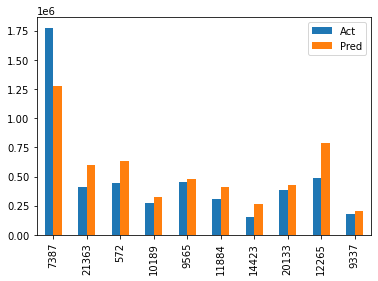

In [62]:
pred_act_train.head(10).plot(kind='bar')

### SDGRegressor

## Normalizing X variable

In [63]:
x=kch1[['lat', 'long', 'view', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'zipcode', 'waterfront', 'floors',
       'year_old', 'yr_renovated']]
y=kch1["price"]

In [64]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25,random_state=8)  # Test size (70:30 less for test), random state will lock the data in train or test

In [65]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
mn.fit(x_train)

MinMaxScaler()

In [66]:
x_train_trans=mn.transform(x_train)
x_test_trans=mn.transform(x_test)

In [67]:
x_train_trans_df=pd.DataFrame(x_train_trans, columns=x_train.columns)
x_train_trans_df.head(5)

lat                 long                 view  \
0                 0.72                 0.08                 0.50   
1                 0.93                 0.71                 0.00   
2                 0.57                 0.16                 0.00   
3                 0.56                 0.08                 0.00   
4                 0.90                 0.60                 0.00   

              bedrooms            bathrooms          sqft_living  \
0                 0.50                 0.69                 0.71   
1                 0.50                 0.38                 0.42   
2                 0.75                 0.62                 0.43   
3                 0.25                 0.00                 0.18   
4                 0.00                 0.31                 0.17   

              sqft_lot            condition                grade  \
0                 0.03                 0.00                 1.00   
1                 0.01                 0.00                 0.50   
2                 0.02                 0.50                 0.33   
3                 0.02                 1.00                 0.17   
4                 0.04                 0.00                 0.50   

            sqft_above        sqft_basement        sqft_living15  \
0                 0.83                 0.00                 0.89   
1                 0.31                 0.40                 0.36   
2                 0.29                 0.48                 0.04   
3                 0.01                 0.45                 0.03   
4                 0.20                 0.00                 0.18   

            sqft_lot15              zipcode           waterfront  \
0                 0.04                 0.55                 0.00   
1                 0.02                 0.09                 0.00   
2                 0.03                 0.54                 0.00   
3                 0.05                 0.53                 0.00   
4                 0.02                 0.26                 0.00   

                floors             year_old         yr_renovated  
0                 0.80                 0.27                 0.00  
1                 0.40                 0.03                 0.00  
2                 0.20                 0.77                 0.00  
3                 0.00                 0.63                 0.00  
4                 0.00                 0.09                 0.00

In [68]:
from sklearn.linear_model import SGDRegressor

In [69]:
sgd=SGDRegressor(loss="squared_error",epsilon=0.0001, max_iter=100000000, penalty='l1',tol=1e-7, random_state=8)

In [70]:
sgd.fit(x_train_trans,y_train)

SGDRegressor(epsilon=0.0001, max_iter=100000000, penalty='l1', random_state=8,
             tol=1e-07)

In [71]:
sgd.score(x_train_trans,y_train)

0.7284541697619418

In [72]:
sgd.score(x_test_trans,y_test)

0.7444741974386568

In [73]:
pred_train=sgd.predict(x_train_trans)
pred_test=sgd.predict(x_test_trans)

In [74]:
pred_act_train=pd.DataFrame({'Act':y_train, 'Pred':pred_train})
pred_act_train.head(4)

Act                 Pred
7387          1,775,000.00         1,308,456.32
21363           410,000.00           582,910.29
572             442,000.00           590,586.49
10189           270,000.00           316,413.28

<AxesSubplot:>

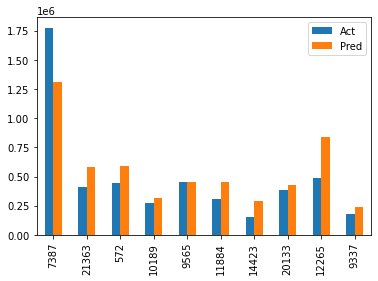

In [75]:
pred_act_train.head(10).plot(kind='bar')

### OLS Model

In [76]:
import statsmodels.api as sm

In [77]:
X=kch1[['lat', 'long', 'view', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'zipcode', 'waterfront', 'floors',
       'year_old', 'yr_renovated']]
Y=kch1["price"]

In [78]:
X= sm.add_constant(X)   # adding a constant

In [79]:
model=sm.OLS(Y,X).fit()      #Predictions=model.predict(X)

In [80]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     3291.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:51:49   Log-Likelihood:            -2.9020e+05
No. Observations:               21613   AIC:                         5.804e+05
Df Residuals:                   21594   BIC:                         5.806e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.326e+06   2.36e+06     -1.408